# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='
weather_data = {}
count=0

In [5]:
for city in cities[:250]:
    city_name = cities[count]
    print(f'Processing city {count} | {city_name}')
    response = requests.get(f'{base_url}{city_name}').json()
    if response['cod']=='404':
        print('City not found. Skipping...')
    else:
        weather_data[count]={
        'City':response['name'],
        'Lat':response['coord']['lat'],
        'Lng':response['coord']['lon'],
        'Max Temp':response['main']['temp_max'],
        'Humidity':response['main']['humidity'],
        'Cloudiness':response['clouds']['all'],
        'Wind Speed':response['wind']['speed'],
        'Country':response['sys']['country'],
        'Date':response['dt']
    }
    count+=1

Processing city 0 | hasaki
Processing city 1 | bathsheba
Processing city 2 | narsaq
Processing city 3 | buta
Processing city 4 | oistins
Processing city 5 | carnarvon
Processing city 6 | albany
Processing city 7 | show low
Processing city 8 | jamestown
Processing city 9 | taolanaro
City not found. Skipping...
Processing city 10 | bambous virieux
Processing city 11 | new norfolk
Processing city 12 | hilo
Processing city 13 | brechin
Processing city 14 | mataura
Processing city 15 | sao filipe
Processing city 16 | atasu
Processing city 17 | saskylakh
Processing city 18 | avera
Processing city 19 | sayansk
Processing city 20 | praya
Processing city 21 | cape town
Processing city 22 | urumqi
Processing city 23 | leningradskiy
Processing city 24 | makhachkala
Processing city 25 | vaini
Processing city 26 | nikolskoye
Processing city 27 | mar del plata
Processing city 28 | lata
Processing city 29 | santa maria
Processing city 30 | yuanli
Processing city 31 | ribeira grande
Processing city 32

In [6]:
import time
time.sleep(30)

In [7]:
for city in cities[250:]:
    city_name = cities[count]
    print(f'Processing city {count} | {city_name}')
    response = requests.get(f'{base_url}{city_name}').json()
    if response['cod']=='404':
        print('City not found. Skipping...')
    else:
        weather_data[count]={
        'City':response['name'],
        'Lat':response['coord']['lat'],
        'Lng':response['coord']['lon'],
        'Max Temp':response['main']['temp_max'],
        'Humidity':response['main']['humidity'],
        'Cloudiness':response['clouds']['all'],
        'Wind Speed':response['wind']['speed'],
        'Country':response['sys']['country'],
        'Date':response['dt']
    }
    count+=1

Processing city 250 | zaozerne
Processing city 251 | midland
Processing city 252 | paciran
Processing city 253 | sorvag
City not found. Skipping...
Processing city 254 | pathein
Processing city 255 | hualmay
Processing city 256 | tuatapere
Processing city 257 | nome
Processing city 258 | norman wells
Processing city 259 | dingle
Processing city 260 | santa cruz
Processing city 261 | kiama
Processing city 262 | coihaique
Processing city 263 | guerrero negro
Processing city 264 | tateyama
Processing city 265 | volovo
Processing city 266 | izhma
Processing city 267 | port lincoln
Processing city 268 | esperance
Processing city 269 | cherskiy
Processing city 270 | princeton
Processing city 271 | port alfred
Processing city 272 | richards bay
Processing city 273 | nalut
Processing city 274 | mergui
City not found. Skipping...
Processing city 275 | nhulunbuy
Processing city 276 | nizhneyansk
City not found. Skipping...
Processing city 277 | lakes entrance
Processing city 278 | kannangad
Proc

Processing city 496 | lerwick
Processing city 497 | kinablangan
Processing city 498 | dondo
Processing city 499 | ayagoz
Processing city 500 | nuevo imperial
Processing city 501 | los llanos de aridane
Processing city 502 | koyilandi
City not found. Skipping...
Processing city 503 | great yarmouth
Processing city 504 | andevoranto
City not found. Skipping...
Processing city 505 | renukut
Processing city 506 | kruisfontein
Processing city 507 | srednekolymsk
Processing city 508 | abay
Processing city 509 | katsiveli
City not found. Skipping...
Processing city 510 | cap malheureux
Processing city 511 | chengzihe
Processing city 512 | sovetskiy
Processing city 513 | cortes
Processing city 514 | dakar
Processing city 515 | maceio
Processing city 516 | pozega
Processing city 517 | monster
Processing city 518 | sault sainte marie
Processing city 519 | yagodnoye
Processing city 520 | warmbad
Processing city 521 | coahuayana
Processing city 522 | ostrovnoy
Processing city 523 | goulburn
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame(weather_data).transpose()
weather_df.to_csv('Output/city_weather_data.csv')
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,79.2,89,100,10.74,JP,1628357037
1,Bathsheba,13.2167,-59.5167,86.61,66,40,13.8,BB,1628356939
2,Narsaq,60.9167,-46.05,52.02,79,100,4.97,GL,1628356949
3,Buta,2.7858,24.73,70.2,99,99,2.8,CD,1628357329
4,Oistins,13.0667,-59.5333,86.09,66,40,13.8,BB,1628357330


In [9]:
weather_df['Lat']=weather_df['Lat'].astype('float')
weather_df['Lng']=weather_df['Lng'].astype('float')
weather_df['Max Temp']=weather_df['Max Temp'].astype('float')
weather_df['Wind Speed']=weather_df['Wind Speed'].astype('float')
weather_df['Humidity']=weather_df['Humidity'].astype('int')
weather_df['Cloudiness']=weather_df['Cloudiness'].astype('int')
weather_df['Date']=weather_df['Date'].astype('int')
weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int32
Cloudiness      int32
Wind Speed    float64
Country        object
Date            int32
dtype: object

In [10]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.824153,19.307913,70.846780,69.093023,58.241503,7.821825,1.628357e+09
std,33.290096,90.194313,14.884967,22.060245,37.470476,5.525703,2.439193e+02
min,-54.800000,-179.166700,29.860000,7.000000,0.000000,0.000000,1.628357e+09
25%,-6.671700,-61.010900,61.365000,57.500000,20.000000,3.990000,1.628357e+09
50%,24.700000,25.570100,73.150000,74.000000,73.000000,6.800000,1.628357e+09
75%,49.074800,95.327750,81.510000,86.500000,95.000000,10.200000,1.628357e+09
max,78.218600,179.316700,116.010000,100.000000,100.000000,35.680000,1.628358e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

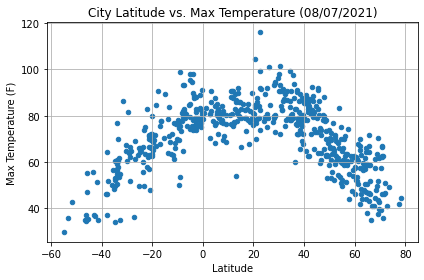

In [14]:
lat_temp = weather_df.plot('Lat','Max Temp',kind='scatter',
                xlabel='Latitude',ylabel='Max Temperature (F)',
                title=f'City Latitude vs. Max Temperature (08/07/2021)',
               grid=True)
plt.tight_layout()
plt.savefig('Output/lat_maxtemp.png')

## Latitude vs. Humidity Plot

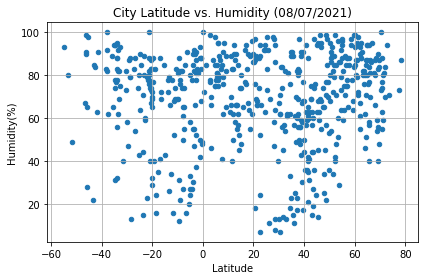

In [15]:
weather_df.plot('Lat','Humidity',kind='scatter',
                xlabel='Latitude',ylabel='Humidity(%)',
                title=f'City Latitude vs. Humidity (08/07/2021)',
               grid=True)
plt.tight_layout()
plt.savefig('Output/lat_humidity.png')

## Latitude vs. Cloudiness Plot

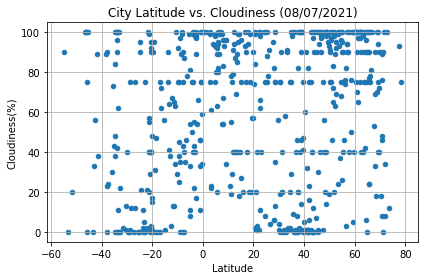

In [16]:
weather_df.plot('Lat','Cloudiness',kind='scatter',
                xlabel='Latitude',ylabel='Cloudiness(%)',
                title=f'City Latitude vs. Cloudiness (08/07/2021)',
               grid=True)
plt.tight_layout()
plt.savefig('Output/lat_cloudiness.png')

## Latitude vs. Wind Speed Plot

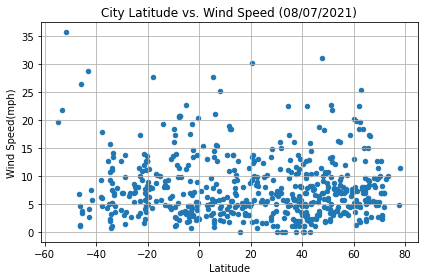

In [17]:
weather_df.plot('Lat','Wind Speed',kind='scatter',
                xlabel='Latitude',ylabel='Wind Speed(mph)',
                title=f'City Latitude vs. Wind Speed (08/07/2021)',
               grid=True)
plt.tight_layout()
plt.savefig('Output/lat_windspeed.png')

## Linear Regression

In [18]:
nh_weather_df = weather_df[weather_df['Lat'] >= 0].reset_index(drop=True)
sh_weather_df = weather_df[weather_df['Lat'] <= 0].reset_index(drop=True)
nh_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,79.20,89,100,10.74,JP,1628357037
1,Bathsheba,13.2167,-59.5167,86.61,66,40,13.80,BB,1628356939
2,Narsaq,60.9167,-46.0500,52.02,79,100,4.97,GL,1628356949
3,Buta,2.7858,24.7300,70.20,99,99,2.80,CD,1628357329
4,Oistins,13.0667,-59.5333,86.09,66,40,13.80,BB,1628357330


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

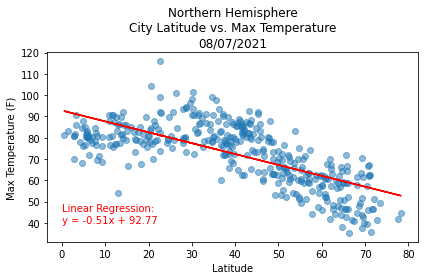

In [19]:
nh_lat = nh_weather_df['Lat']
nh_temp = nh_weather_df['Max Temp']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_temp)
lin_regress = nh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(nh_lat,nh_temp,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere\nCity Latitude vs. Max Temperature\n08/07/2021')
plt.plot(nh_lat,lin_regress,'r')
plt.annotate(line_eq,(0,40),color='red')
plt.tight_layout()
plt.show
plt.savefig('Output/nh_lat_maxtemp_linregress.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

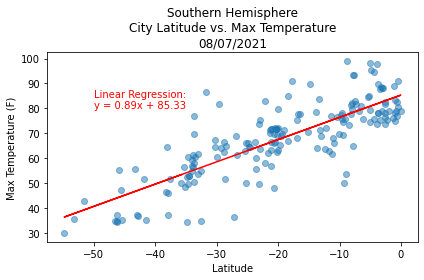

In [20]:
sh_lat = sh_weather_df['Lat']
sh_temp = sh_weather_df['Max Temp']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_temp)
lin_regress = sh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(sh_lat,sh_temp,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere\nCity Latitude vs. Max Temperature\n08/07/2021')
plt.plot(sh_lat,lin_regress,'r')
plt.annotate(line_eq,(-50,80),color='red')
plt.tight_layout()
plt.show
plt.savefig('Output/sh_lat_maxtemp_linregress.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

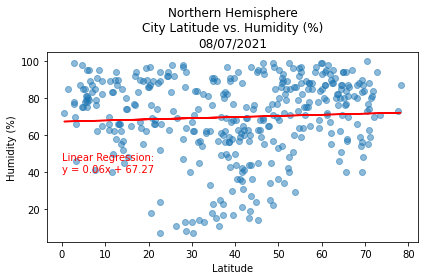

In [21]:
nh_humidity = nh_weather_df['Humidity']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_humidity)
lin_regress = nh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(nh_lat,nh_humidity,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere\nCity Latitude vs. Humidity (%)\n08/07/2021')
plt.plot(nh_lat,lin_regress,'r')
plt.annotate(line_eq,(0,40),color='red')
plt.tight_layout()
plt.show
plt.savefig('Output/nh_lat_humidity_linregress.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

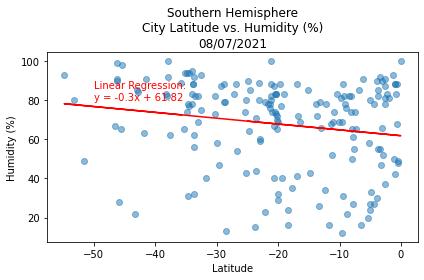

In [22]:
sh_humidity = sh_weather_df['Humidity']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_humidity)
lin_regress = sh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(sh_lat,sh_humidity,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere\nCity Latitude vs. Humidity (%)\n08/07/2021')
plt.plot(sh_lat,lin_regress,'r')
plt.annotate(line_eq,(-50,80),color='red')
plt.tight_layout()
plt.show
plt.savefig('Output/sh_lat_humidity_linregress.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

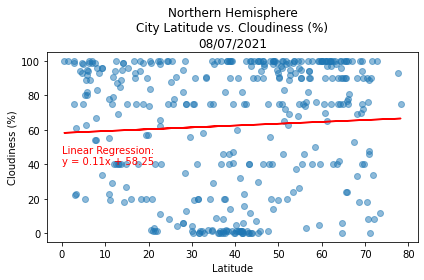

In [23]:
nh_clouds = nh_weather_df['Cloudiness']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_clouds)
lin_regress = nh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(nh_lat,nh_clouds,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere\nCity Latitude vs. Cloudiness (%)\n08/07/2021')
plt.plot(nh_lat,lin_regress,'r')
plt.annotate(line_eq,(0,40),color='red')
plt.tight_layout()
plt.show
plt.savefig('Output/nh_lat_cloudiness_linregress.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

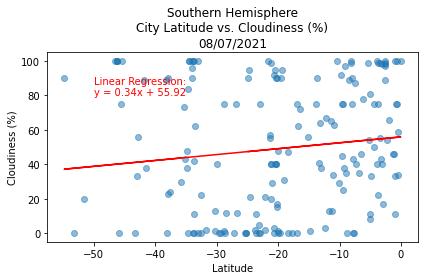

In [24]:
sh_cloudiness = sh_weather_df['Cloudiness']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_cloudiness)
lin_regress = sh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(sh_lat,sh_cloudiness,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere\nCity Latitude vs. Cloudiness (%)\n08/07/2021')
plt.plot(sh_lat,lin_regress,'r')
plt.annotate(line_eq,(-50,80),color='red')
plt.tight_layout()
plt.show
plt.savefig('Output/sh_lat_cloudiness_linregress.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

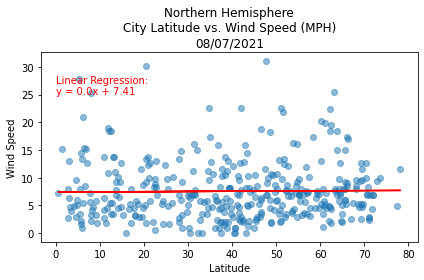

In [29]:
nh_wind = nh_weather_df['Wind Speed']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_wind)
lin_regress = nh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(nh_lat,nh_wind,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere\nCity Latitude vs. Wind Speed (MPH)\n08/07/2021')
plt.plot(nh_lat,lin_regress,'r')
plt.annotate(line_eq,(0,25),color='red')
plt.tight_layout()
plt.show
plt.savefig('Output/nh_lat_windspeed_linregress.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

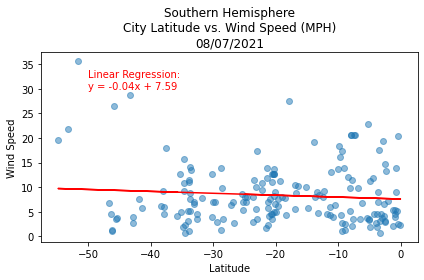

In [28]:
sh_wind = sh_weather_df['Wind Speed']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_wind)
lin_regress = sh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(sh_lat,sh_wind,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere\nCity Latitude vs. Wind Speed (MPH)\n08/07/2021')
plt.plot(sh_lat,lin_regress,'r')
plt.annotate(line_eq,(-50,30),color='red')
plt.tight_layout()
plt.show
plt.savefig('Output/sh_lat_windspeed_linregress.png')

## Observable trends

1. Strong correlation between latitude and max temperature, as shown in the charts comparing latitude to max temperature for the northern and southern hemispheres. The closer to the equator (latitude of 0), the higher the max temperature. Would be interesting to look at average and minimum temperatures by latitude as well.

2. Cloudiness appears to trend slightly positive in the northern and southern hemispheres based on latitude, as shown on the charts of the northern and southern hemispheres comparing cloudiness and latitude. Interestingly, weather seems to become slightly more cloudy from south to north rather than based on distance from the equator. This is only a slight positive trend, and the data is scattered enough that more information would be needed to draw any conclusions.

3. Humidity rises more sharply as one approaches the equator from the south than it does from the north as shown in the charts comparing humidity and latitude for the northern and southern hemispheres. Might be due to the relative sizes of the oceans and land mass in the two hemispheres - larger land masses in the northern hemisphere and larger bodies of water in the southern hemisphere.